# Recolectar Datos Usando APIs del Mundo Real

Usando la [API de la NASA](https://api.nasa.gov/) como caso de ejemplo.

In [45]:
import os
import requests
from typing import Any

import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from IPython.display import Image, YouTubeVideo, display

In [2]:
load_dotenv('.env')

True

In [ ]:
API_KEY: str = os.environ['NASA_API_KEY']

## Ejemplo con APOD
Astronomy Picture of the Day

In [ ]:
apod_url: str = f'https://api.nasa.gov/planetary/apod'
apod_params: dict[str, str] = {
    'api_key': API_KEY,
    'date': '2024-12-04'
}
response: requests.Response = requests.get(apod_url, params=apod_params)
apod_data: dict[str, Any] = response.json()
apod_data

{'copyright': '\nNick Wright\n',
 'date': '2024-12-04',
 'explanation': "Does the Sun return to the same spot on the sky every day?\xa0 No.\xa0 A more visual answer is an analemma, a composite of sky images taken at the same time and from the same place over a year.\xa0 At completion, you can see that the Sun makes a figure 8 on the sky.  The featured unusual analemma does not, however, picture the Sun directly: it was created by looking in the opposite direction. All that was required was noting where the shadow of an edge of a house was in the driveway every clear day at the same time.  Starting in March in Falcon, Colorado, USA, the photographer methodically marked the shadow's 1 pm location. In one frame you can even see the photographer himself.  Although this analemma will be completed in 2025, you can start drawing your own driveway analemma -- using no fancy equipment -- as soon as today.",
 'media_type': 'video',
 'service_version': 'v1',
 'title': 'Driveway Analemma',
 'url':

**NOTA:** Federico obtiene otro recurso (imagen) debido a usar otra fecha, pero yo obtube un video de YouTube a la fecha en la que estoy escribiendo este cuaderno, así que indagué por mi cuenta y el video en cuestión se puede ver aquí:

YouTube video ID: 7QB_MOemCqs


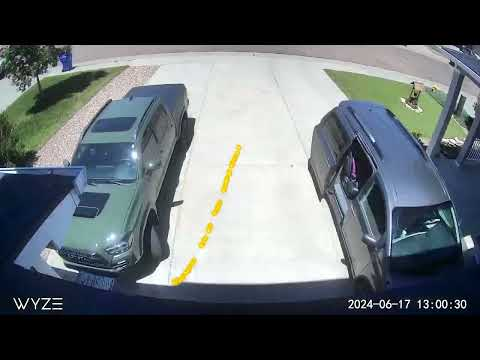

In [ ]:
yt_video_id: str = apod_data['url'].split('embed/')[1].split('?')[0]
print(f'YouTube video ID: {yt_video_id}')
display(YouTubeVideo(yt_video_id))

Ahora sí, lo de Federico:

In [ ]:
fede_url: str = f'https://api.nasa.gov/planetary/apod'
fede_params: dict[str, str] = {
    'api_key': API_KEY,
    'date': '2002-03-20'
}
response: requests.Response = requests.get(fede_url, params=fede_params)
fede_data: dict[str, Any] = response.json()
fede_data

{'copyright': '\nRobert Schwarz \n(U. Wisconsin)\n',
 'date': '2002-03-20',
 'explanation': 'Looking out from the bottom of the world, strange and spectacular sights are sometimes observed.  Such was the case during the long Antarctic night of 1998, as awesome aurora sub-storms were photographed above scientific outposts.  Visible in the left foreground of the above photograph is the Martin A. Pomerantz Observatory while the now defunct SPIREX telescope canvas dome is visible to its right.  The outside temperature at the time this photograph was taken was about -73 Celsius (-100 Fahrenheit), although a slightly heated box sheltered the camera.',
 'hdurl': 'https://apod.nasa.gov/apod/image/0203/spaurora1_schwarz.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'Aurora Over Antarctica',
 'url': 'https://apod.nasa.gov/apod/image/0203/spaurora1_schwarz.jpg'}

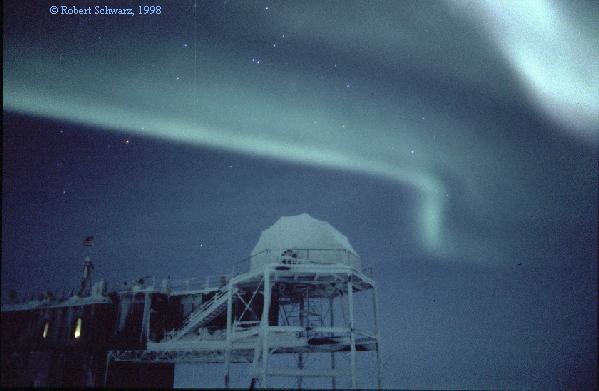

In [ ]:
display(Image(fede_data['url']))

## Ejemplo con DONKI
Space Weather Database of Notifications, Knowledge, Information

In [21]:
def get_donki_data_as_df(start_date: str, end_date: str) -> pd.DataFrame:
    url: str = 'https://api.nasa.gov/DONKI/IPS'
    params: dict[str, str] = {
        'api_key': API_KEY,
        'startDate': start_date,
        'endDate': end_date,
    }
    response: requests.Response = requests.get(url, params=params)
    return pd.DataFrame(response.json())

In [39]:
df: pd.DataFrame = get_donki_data_as_df('2023-12-01', '2023-12-31')
df.head()

,catalog,activityID,location,eventTime,submissionTime,versionId,link,instruments
0,M2M_CATALOG,2023-12-01T00:11:00-IPS-001,STEREO A,2023-12-01T00:11Z,2023-12-06T02:01Z,4,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,"[{'displayName': 'STEREO A: IMPACT'}, {'displa..."
1,M2M_CATALOG,2023-12-01T08:15:00-IPS-001,STEREO A,2023-12-01T08:15Z,2023-12-06T02:52Z,3,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,"[{'displayName': 'STEREO A: IMPACT'}, {'displa..."
2,M2M_CATALOG,2023-12-01T08:48:00-IPS-001,Earth,2023-12-01T08:48Z,2023-12-06T03:58Z,5,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,"[{'displayName': 'DSCOVR: PLASMAG'}, {'display..."
3,M2M_CATALOG,2023-12-04T04:30:00-IPS-001,Earth,2023-12-04T04:30Z,2023-12-05T17:02Z,2,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,"[{'displayName': 'DSCOVR: PLASMAG'}, {'display..."
4,M2M_CATALOG,2023-12-04T08:09:00-IPS-001,STEREO A,2023-12-04T08:09Z,2023-12-05T18:23Z,3,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,"[{'displayName': 'STEREO A: IMPACT'}, {'displa..."


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   catalog         16 non-null     object
 1   activityID      16 non-null     object
 2   location        16 non-null     object
 3   eventTime       16 non-null     object
 4   submissionTime  16 non-null     object
 5   versionId       16 non-null     int64 
 6   link            16 non-null     object
 7   instruments     16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


Transformar fechas al tipo correcto:

In [41]:
print(df['eventTime'][0])
print(type(df['eventTime'][0]))

2023-12-01T00:11Z
<class 'str'>


In [ ]:
df['eventTime'] = pd.to_datetime(
    df['eventTime'],
    errors='coerce',
    utc=True,
)
print(df['eventTime'][0])
print(type(df['eventTime'][0]))

2023-12-01 00:11:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [43]:
print(df['submissionTime'][0])
print(type(df['submissionTime'][0]))

2023-12-06T02:01Z
<class 'str'>


In [44]:
df['submissionTime'] = pd.to_datetime(
    df['submissionTime'],
    errors='coerce',
    utc=True,
)
print(df['submissionTime'][0])
print(type(df['submissionTime'][0]))

2023-12-06 02:01:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
